In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf

from nn_mobile_net import MobileNet
from keras.preprocessing import image

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Load a few images

In [3]:
local_images = [
    'dog.jpg', 'canoe.jpg', 'car.jpg', 'cat.jpg', 
    'tabby.jpg', 'submarine.jpg', 'snake.jpg', 'teapot.jpg'
]

In [4]:
pictures = np.zeros((8, 224, 224, 3))
for i, pic in enumerate(local_images):
    x = image.load_img('images/' + pic, target_size=(224, 224))
    pictures[i] = image.img_to_array(x)
    
pictures /= 255.0

# Try it

In [5]:
model = MobileNet(tf.train.RMSPropOptimizer(1e-3))

In [6]:
weights = np.load('extracted_weights.npy')[()]
class_names = np.load('imagenet_class_names.npy')

In [7]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [8]:
X = pictures.copy()
X -= mean
X /= std

In [9]:
predictions = model.predict_proba(X, network_weights=weights)

In [10]:
predicted_classes = class_names[predictions.argsort()[:, 999:] - 1]
predicted_probs = np.sort(predictions)[:, 999:]

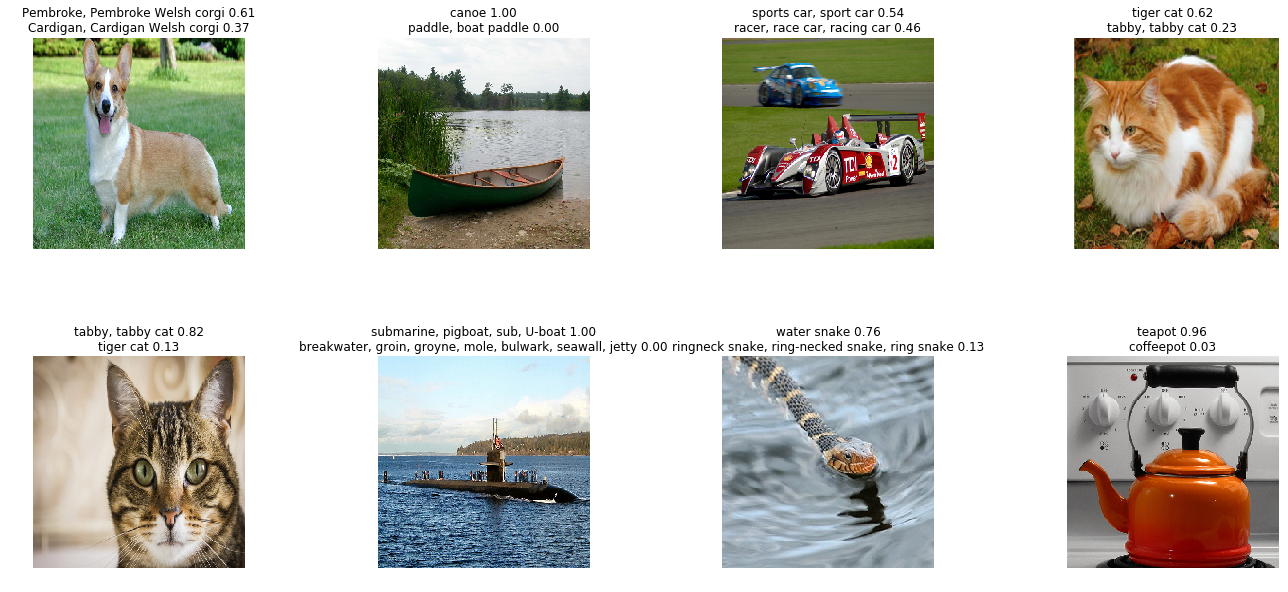

In [11]:
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 9))
axes = axes.flatten()
for i, pic in enumerate(pictures):
    axes[i].set_axis_off();
    axes[i].imshow(pic);
    title = (predicted_classes[i][-1] + ' {0:.2f}' +\
        '\n' + predicted_classes[i][-2] + ' {1:.2f}').\
        format(predicted_probs[i][-1], predicted_probs[i][-2])
    axes[i].set_title(title);
plt.tight_layout()